In [27]:
# load graph representation of network
# station -> nodes
# stretches -> edges

import networkx as nx
import pandas as pd

STRETCHES_PATH = './static/stretches.csv'
STATIONS_PATH = './static/stations.csv'

stretches = pd.read_csv(STRETCHES_PATH, dtype=str).dropna(how='all')
stations = pd.read_csv(STATIONS_PATH, dtype=str).dropna(how='all')

G = nx.Graph()

# add nodes
station_list = list(stations.itertuples(index=False, name=None)) # [(station_name, station_uic)]
nodes = [(station[1], {'station_name': station[0]}) for station in station_list]
G.add_nodes_from(nodes)

# add edges
# attraction force is used to draw the graph by defining the attraction force between the two nodes and is the inverted travel time
edge_list = list(stretches[['station_uic_from', 'station_uic_to', 'station_name_from','station_name_to','travel_cost','super_name']].itertuples(index=False, name=None)) # [(station_name_from, station_uic_from, station_name_to, station_uic_from, travel_cost, super_name)]
edges = [(edge[0], edge[1], {'station_name_from': edge[2], 'station_name_to': edge[3], 'travel_cost': int(edge[4]), 'super_name': edge[5], 'attraction_force': (1 / int(edge[4])) if int(edge[4]) > 0 else 0}) for edge in edge_list]
G.add_edges_from(edges)


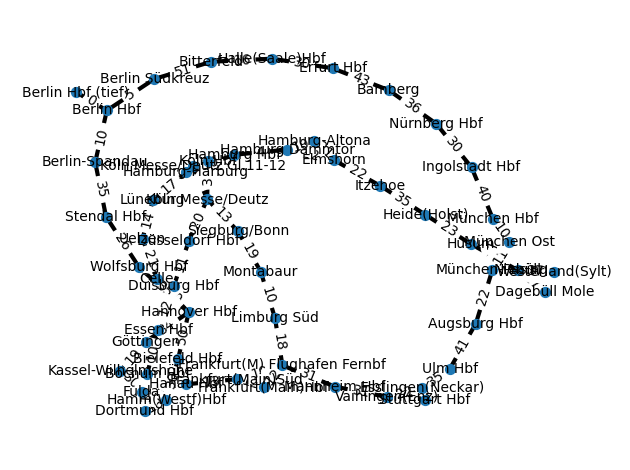

In [28]:

if True:
    import matplotlib.pyplot as plt

    nodes = list(G.nodes())
    initial_pos = {'8000152': (0,0)}

    pos = nx.spring_layout(G, seed=4, pos=initial_pos, fixed=['8000152'])  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=50)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=3)

    # node labels
    labels = {n: d["station_name"] for n, d in G.nodes(data=True)}
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif", labels=labels)
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "travel_cost")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()
